In [1]:
# Oanda API teszter

In [2]:
## Account

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pld

In [2]:
import cfg
import trader
import quant

running price stream
running transaction stream
running account update polling


In [3]:
print(f'{cfg.account.balance} nav:{cfg.account.NAV} margin:{cfg.account.marginAvailable}')

99996.3732 nav:100013.7725 margin:99804.8677


In [6]:
trades=[]
for t in cfg.account.trades:
    trade = dict(
    instrument=t.instrument,
    currentunits=t.currentUnits,
    unrealizedPL = t.unrealizedPL)
    trades.append(trade)
trades_df = pd.DataFrame(trades)
trades_df

,instrument,currentunits,unrealizedPL
0,EUR_USD,1000.0,-1.0013
1,EUR_GBP,-1000.0,0.7751
2,EUR_AUD,1000.0,14.0674
3,EUR_CAD,1000.0,-0.3480
4,USD_CAD,-1000.0,1.2886
5,NZD_USD,1000.0,2.8249


In [5]:
print(f'{cfg.account.balance} nav:{cfg.account.NAV} margin:{cfg.account.marginAvailable}')

99996.3732 nav:100013.9799 margin:99805.0794


In [5]:
def check_breakeven_for_instrument(instrument: str, trades: list):
    all_breakeven = []
    for t in trades:
        print('checking trade:', t)
        if t.instrument == instrument:
            for o in cfg.account.orders:
                if o.id == t.stopLossOrderID:
                    all_breakeven.append(
                    (t.currentUnits > 0 ) and (o.price >=t.price)
                    or
                    (t.currentUnits <0 and o.price<=t.price))
                    
    return all(all_breakeven)

In [6]:
check_breakeven_for_instrument('AUD_USD', cfg.account.trades)

True

In [8]:
def check_open_trades():
    for t in cfg.account.trades:
        print(t)

In [15]:
for t in cfg.account.trades:
    if t.stopLossOrderID is None:
        if t.unrealizedPL >= 0:
            print('move to b/e', t.id, t.instrument, t.unrealizedPL)
        else:
            print('loss close', t.id, t.instrument, t.unrealizedPL)


loss close 101 EUR_USD -1.8802
move to b/e 110 EUR_GBP 1.5275
loss close 104 EUR_CAD -0.1531
move to b/e 99 USD_CAD 0.3996
move to b/e 108 NZD_USD 2.9679


In [8]:
for o in cfg.account.orders:
    print(o)

id: '183410'
createTime: '2022-01-26T09:38:07.001886322Z'
state: PENDING
type: TAKE_PROFIT
tradeID: '183409'
price: 0.71371
timeInForce: GTC
triggerCondition: DEFAULT


In [10]:
for p in cfg.account.positions:
    print(p)
    break

instrument: EUR_USD
pl: -388.9146
unrealizedPL: 0.6079
marginUsed: 8.2099
resettablePL: -388.9146
financing: -78.4801
commission: 0.0
guaranteedExecutionFees: 0.0
long:
  units: 0.0
  pl: -156.3461
  unrealizedPL: 0.0
  resettablePL: -156.3461
  financing: -79.6348
  guaranteedExecutionFees: 0.0
short:
  units: -364.0
  averagePrice: 1.12933
  tradeIDs:
  - '183576'
  pl: -232.5685
  unrealizedPL: 0.6079
  resettablePL: -232.5685
  financing: 1.1547
  guaranteedExecutionFees: 0.0


In [11]:
cfg.instruments['EUR_USD']

{'name': 'EUR_USD',
 'type': 'CURRENCY',
 'displayName': 'EUR/USD',
 'pipLocation': -4,
 'displayPrecision': 5,
 'tradeUnitsPrecision': 0,
 'minimumTradeSize': '1.0',
 'maximumTrailingStopDistance': '1.0',
 'minimumTrailingStopDistance': '0.0005',
 'maximumPositionSize': '0.0',
 'maximumOrderUnits': '100000000.0',
 'marginRate': '0.02',
 'bid': 1.12766,
 'ask': 1.12779,
 'spread': 0.00013}

In [ ]:
# Quant class and methods

In [ ]:
q = quant.Quant()

In [32]:
q.get_signal('EUR_USD')

{'inst': 'EUR_USD', 's1': 1, 's2': 0, 's3': 0, 's4': 0, 'lrg': 1, 'sto': 77.84}


(1, 'S1')

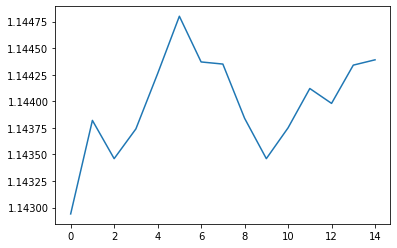

In [42]:
df=q.get_candles('EUR_USD')
df.mid_c.plot();

In [44]:
# signal 1 : momentum

# add momentum indicators
df['mom'] = df.mid_c.diff(10)
df['mom_pos'] = np.sign(df.mom)
df['mom_slope'] = np.sign(df.mom.diff(1))
df[['mid_c', 'mom', 'mom_pos', 'mom_slope']].tail(5)
# evaluate mom

,mid_c,mom,mom_pos,mom_slope
10,1.14375,0.00081,1.0,NaN
11,1.14412,0.00030,1.0,-1.0
12,1.14398,0.00052,1.0,1.0
13,1.14434,0.00060,1.0,1.0
14,1.14439,0.00013,1.0,-1.0
